In [103]:
import re
import json
import matplotlib.pyplot as plt
import numpy as np

In [104]:
regex = r"Trainable params: ([0-9,]*)"

In [105]:
def getNumTrainableParams(summary):
    m = re.search(regex,summary)
    num = m.group(1)
    return int(num.replace(',',''))

In [106]:
models1=["AttConvNet"+str(i) for i in range(1,5)]
models2=["ConvNet"+str(i) for i in range(1,7)]
models3=["DenseNet"+str(i) for i in range(1,9)]
models4=["NLNet"+str(i) for i in range(1,4)]
models=[]
models.extend(models1)
models.extend(models2)
models.extend(models3)
models.extend(models4)

In [107]:
datasets=['Disney','Amazon','facebook','Enron']

In [108]:
dataName = datasets[3]
path = "Results/"+dataName+"/results.json"
f = open(path)
results = json.load(f)
f.close()

In [109]:
trainableParamsAuc = []
for model in models:
    auc = results[model]['auc_score']
    trainableParams = getNumTrainableParams(results[model]['model_summary'])
    trainableParamsAuc.append((trainableParams,auc))
trainableParamsAuc = sorted(trainableParamsAuc)

In [110]:
attConvNetAuc = []
i=1
for model in models1:
    auc = results[model]['auc_score']
    attConvNetAuc.append((i,auc))
    i+=1

In [111]:
convNetAuc = []
i=1
for model in models2:
    auc = results[model]['auc_score']
    convNetAuc.append((i,auc))
    i+=1

In [112]:
denseNetAuc = []
i=1
for model in models3:
    auc = results[model]['auc_score']
    denseNetAuc.append((i,auc))
    i+=1

In [113]:
nlNetAuc = []
i=1
for model in models4:
    auc = results[model]['auc_score']
    nlNetAuc.append((i,auc))
    i+=1

In [114]:
resultsPath = "Results/"+dataName

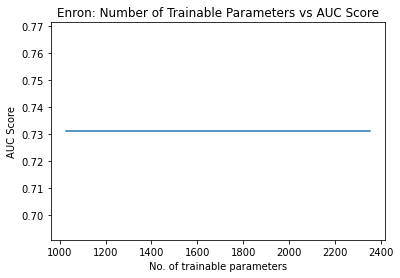

In [115]:
# Trainable params vs Auc
trainableParamsAuc = np.array(trainableParamsAuc)
plt.plot(trainableParamsAuc[:,0],trainableParamsAuc[:,1])
plt.xlabel("No. of trainable parameters")
plt.ylabel("AUC Score")
plt.title(dataName+": "+"Number of Trainable Parameters vs AUC Score")
plt.savefig(resultsPath+"/TrainableParams_vs_Auc.png")
plt.show()

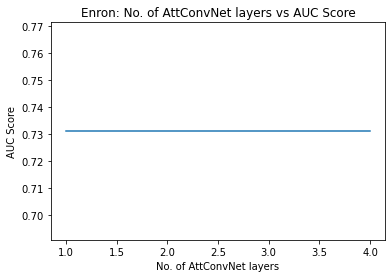

In [116]:
# AttConvNet vs Auc
attConvNetAuc = np.array(attConvNetAuc)
plt.plot(attConvNetAuc[:,0],attConvNetAuc[:,1])
plt.xlabel("No. of AttConvNet layers")
plt.ylabel("AUC Score")
plt.title(dataName+": "+"No. of AttConvNet layers vs AUC Score")
plt.savefig(resultsPath+"/AttConvNet_vs_Auc.png")
plt.show()

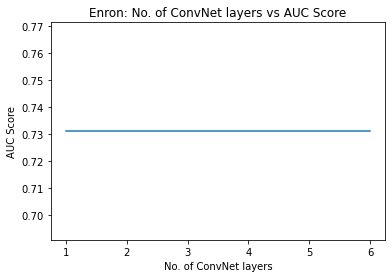

In [117]:
# ConvNet vs Auc
convNetAuc = np.array(convNetAuc)
plt.plot(convNetAuc[:,0],convNetAuc[:,1])
plt.xlabel("No. of ConvNet layers")
plt.ylabel("AUC Score")
plt.title(dataName+": "+"No. of ConvNet layers vs AUC Score")
plt.savefig(resultsPath+"/ConvNet_vs_Auc.png")
plt.show()

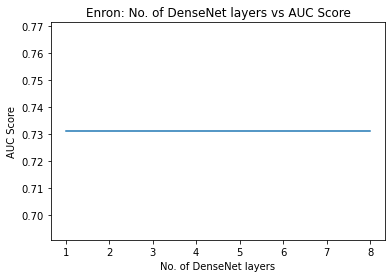

In [118]:
# DenseNet vs Auc
denseNetAuc = np.array(denseNetAuc)
plt.plot(denseNetAuc[:,0],denseNetAuc[:,1])
plt.xlabel("No. of DenseNet layers")
plt.ylabel("AUC Score")
plt.title(dataName+": "+"No. of DenseNet layers vs AUC Score")
plt.savefig(resultsPath+"/DenseNet_vs_Auc.png")
plt.show()

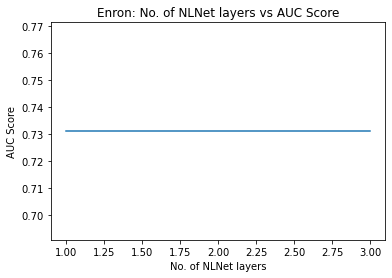

In [119]:
# NLNet vs Auc
nlNetAuc = np.array(nlNetAuc)
plt.plot(nlNetAuc[:,0],nlNetAuc[:,1])
plt.xlabel("No. of NLNet layers")
plt.ylabel("AUC Score")
plt.title(dataName+": "+"No. of NLNet layers vs AUC Score")
plt.savefig(resultsPath+"/NLNet_vs_Auc.png")
plt.show()